Saved: C:\Users\Reshmi\OneDrive\Desktop\Project-Sravani\GreenCard\Reshmi\cropped_images\cropped_110.jpg
Saved: C:\Users\Reshmi\OneDrive\Desktop\Project-Sravani\GreenCard\Reshmi\cropped_images\cropped_111.jpg
Saved: C:\Users\Reshmi\OneDrive\Desktop\Project-Sravani\GreenCard\Reshmi\cropped_images\cropped_113.jpg
Saved: C:\Users\Reshmi\OneDrive\Desktop\Project-Sravani\GreenCard\Reshmi\cropped_images\cropped_114.jpg
Saved: C:\Users\Reshmi\OneDrive\Desktop\Project-Sravani\GreenCard\Reshmi\cropped_images\cropped_115.jpg
Saved: C:\Users\Reshmi\OneDrive\Desktop\Project-Sravani\GreenCard\Reshmi\cropped_images\cropped_116.jpg
Saved: C:\Users\Reshmi\OneDrive\Desktop\Project-Sravani\GreenCard\Reshmi\cropped_images\cropped_12.jpg
Saved: C:\Users\Reshmi\OneDrive\Desktop\Project-Sravani\GreenCard\Reshmi\cropped_images\cropped_120.jpg
Saved: C:\Users\Reshmi\OneDrive\Desktop\Project-Sravani\GreenCard\Reshmi\cropped_images\cropped_122.jpg
Saved: C:\Users\Reshmi\OneDrive\Desktop\Project-Sravani\GreenCard

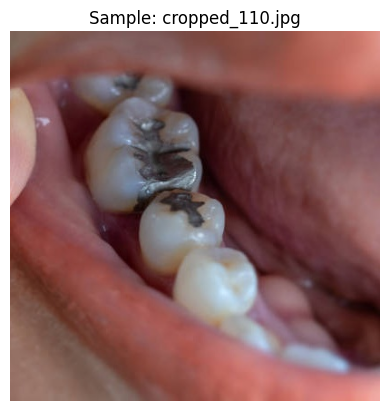

In [1]:
import cv2
import os
import matplotlib.pyplot as plt

# Define original image directory
image_dir = r'C:\Users\Reshmi\OneDrive\Desktop\Project-Sravani\GreenCard\srvani_images'

# Define separate output directory for cropped images
save_dir = r'C:\Users\Reshmi\OneDrive\Desktop\Project-Sravani\GreenCard\Reshmi\cropped_images'
os.makedirs(save_dir, exist_ok=True)

# Get up to 1000 .jpg files from the source folder
image_filenames = [
    fname for fname in os.listdir(image_dir)
    if fname.lower().endswith(".jpg")
][:1000]

# Crop and save images
for fname in image_filenames:
    image_path = os.path.join(image_dir, fname)
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Failed to load {fname}")
        continue

    height, width = img.shape[:2]

    # Define cropping coordinates for center crop (smallest square)
    min_dim = min(height, width)
    start_x = (width - min_dim) // 2
    start_y = (height - min_dim) // 2
    end_x = start_x + min_dim
    end_y = start_y + min_dim

    cropped_img = img[start_y:end_y, start_x:end_x]

    save_path = os.path.join(save_dir, f"cropped_{fname}")
    cv2.imwrite(save_path, cropped_img)
    print(f"Saved: {save_path}")

print("All images cropped and saved in a separate folder!")

# --- Display the first cropped image ---

cropped_files = [f for f in os.listdir(save_dir) if f.lower().endswith(".jpg")]
if cropped_files:
    first_image_path = os.path.join(save_dir, cropped_files[0])
    test_image = cv2.imread(first_image_path)
    test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

    plt.imshow(test_image_rgb)
    plt.axis("off")
    plt.title(f"Sample: {cropped_files[0]}")
    plt.show()
else:
    print("No cropped images found to display.")
